In [54]:
%matplotlib inline
import openmc

In [55]:
# Define materials

# Fresh Fuel
uo2 = openmc.Material(name="uo2")
# U enrichment as a weight percentage?
uo2.add_nuclide('U235', 0.04)
uo2.add_nuclide('U238', 0.96)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.5)

# Zircaloy
zirc = openmc.Material(name="zircaloy")
zirc.add_nuclide('Cr52', 7.589e-5)
zirc.add_nuclide('Fe56', 1.484e-4)
zirc.add_nuclide('Zr90', 4.298e-2)

# Water
water = openmc.Material(name="h2o")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)
# above only uses free-atom cross sections - use an S(α,β) table so that the bound atom cross section is used at thermal energies
water.add_s_alpha_beta('c_H_in_H2O')

In [56]:
materials = openmc.Materials([uo2, zirc, water])
materials.export_to_xml()

In [57]:
# Defining fuel pin

fuel_outer_radius = openmc.ZCylinder(r=0.8166/2)
clad_inner_radius = openmc.ZCylinder(r=0.833/2)
clad_outer_radius = openmc.ZCylinder(r=0.955/2)

fuel_region = -fuel_outer_radius
gap_region = +fuel_outer_radius & -clad_inner_radius
clad_region = +clad_inner_radius & -clad_outer_radius

fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region

gap = openmc.Cell(name='gap')
gap.fill = water
gap.region = gap_region

clad = openmc.Cell(name='clad')
clad.fill = zirc
clad.region = clad_region

pitch = 1.26
left = openmc.XPlane(-pitch/2, boundary_type='reflective')
right = openmc.XPlane(pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top = openmc.YPlane(pitch/2, boundary_type='reflective')

box = openmc.model.RectangularPrism(width=pitch, height=pitch,
                                    boundary_type='reflective')
type(box)

water_region = -box & +clad_outer_radius

moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region

In [58]:
# Create universe
root_universe = openmc.Universe(cells=(fuel, gap, clad, moderator))

geometry = openmc.Geometry(root_universe)
geometry.export_to_xml()

In [59]:
# Create a point source and settings
point = openmc.stats.Point((0, 0, 0))
source = openmc.IndependentSource(space=point)

settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

settings.export_to_xml()

In [60]:
# Tally

cell_filter = openmc.CellFilter(fuel)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

tally.nuclides = ['U235']
tally.scores = ['total', 'fission', 'absorption', '(n,gamma)']

tallies = openmc.Tallies([tally])
tallies.export_to_xml()

/openmc_venv/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Tally instance already exists with id=1.
  warn(msg, IDWarning)


In [61]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

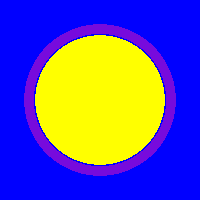

In [62]:
# Plot geometry

plot = openmc.Plot()
plot.filename = 'pinplot'
plot.width = (pitch, pitch)
plot.pixels = (200, 200)
plot.color_by = 'material'
plot.colors = {uo2: 'yellow', water: 'blue'}

plots = openmc.Plots([plot])
plots.export_to_xml()

openmc.plot_geometry()

plot.to_ipython_image()